<a href="https://colab.research.google.com/github/kshero18/Assignments-ML/blob/main/Assignment_2_AML_(DCM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom
!pip install gdcm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.8 MB/s eta 0:00:00


In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ksheerajaks","key":"2c0214db0154fff312692c92a6cedfc6"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle competitions download -c rsna-2024-lumbar-spine-degenerative-classification


100% 28.2G/28.2G [05:53<00:00, 54.0MB/s]
100% 28.2G/28.2G [05:53<00:00, 85.7MB/s]


In [ ]:
!unzip -q rsna-2024-lumbar-spine-degenerative-classification.zip


Loading and EDA


In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Load the CSV file (assuming it exists in the dataset)
labels_df = pd.read_csv('/content/train.csv')

# Display basic information and first few rows
print(labels_df.tail().info())
labels_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1970 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                5 non-null      int64 
 1   spinal_canal_stenosis_l1_l2             5 non-null      object
 2   spinal_canal_stenosis_l2_l3             5 non-null      object
 3   spinal_canal_stenosis_l3_l4             5 non-null      object
 4   spinal_canal_stenosis_l4_l5             5 non-null      object
 5   spinal_canal_stenosis_l5_s1             5 non-null      object
 6   left_neural_foraminal_narrowing_l1_l2   5 non-null      object
 7   left_neural_foraminal_narrowing_l2_l3   5 non-null      object
 8   left_neural_foraminal_narrowing_l3_l4   5 non-null      object
 9   left_neural_foraminal_narrowing_l4_l5   5 non-null      object
 10  left_neural_foraminal_narrowing_l5_s1   5 non-null      object
 11  righ

study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3  \
1970  4282019580                 Normal/Mild                 Normal/Mild   
1971  4283570761                 Normal/Mild                 Normal/Mild   
1972  4284048608                 Normal/Mild                 Normal/Mild   
1973  4287160193                 Normal/Mild                    Moderate   
1974  4290709089                 Normal/Mild                 Normal/Mild   

     spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5  \
1970                 Normal/Mild                 Normal/Mild   
1971                 Normal/Mild                 Normal/Mild   
1972                 Normal/Mild                      Severe   
1973                 Normal/Mild                 Normal/Mild   
1974                 Normal/Mild                 Normal/Mild   

     spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2  \
1970                 Normal/Mild                           Normal/Mild   
1971                 Normal/Mild                           Normal/Mild   
1972                 Normal/Mild                           Normal/Mild   
1973                 Normal/Mild                           Normal/Mild   
1974                 Normal/Mild                           Normal/Mild   

     left_neural_foraminal_narrowing_l2_l3  \
1970                           Normal/Mild   
1971                           Normal/Mild   
1972                           Normal/Mild   
1973                           Normal/Mild   
1974                           Normal/Mild   

     left_neural_foraminal_narrowing_l3_l4  \
1970                           Normal/Mild   
1971                           Normal/Mild   
1972                           Normal/Mild   
1973                           Normal/Mild   
1974                           Normal/Mild   

     left_neural_foraminal_narrowing_l4_l5  ...  \
1970                              Moderate  ...   
1971                           Normal/Mild  ...   
1972                           Normal/Mild  ...   
1973                              Moderate  ...   
1974                           Normal/Mild  ...   

     left_subarticular_stenosis_l1_l2 left_subarticular_stenosis_l2_l3  \
1970                      Normal/Mild                      Normal/Mild   
1971                      Normal/Mild                      Normal/Mild   
1972                      Normal/Mild                      Normal/Mild   
1973                      Normal/Mild                           Severe   
1974                      Normal/Mild                      Normal/Mild   

     left_subarticular_stenosis_l3_l4 left_subarticular_stenosis_l4_l5  \
1970                      Normal/Mild                         Moderate   
1971                      Normal/Mild                      Normal/Mild   
1972                      Normal/Mild                           Severe   
1973                         Moderate                         Moderate   
1974                      Normal/Mild                      Normal/Mild   

     left_subarticular_stenosis_l5_s1 right_subarticular_stenosis_l1_l2  \
1970                      Normal/Mild                       Normal/Mild   
1971                      Normal/Mild                       Normal/Mild   
1972                      Normal/Mild                       Normal/Mild   
1973                      Normal/Mild                       Normal/Mild   
1974                      Normal/Mild                       Normal/Mild   

     right_subarticular_stenosis_l2_l3 right_subarticular_stenosis_l3_l4  \
1970                       Normal/Mild                          Moderate   
1971                       Normal/Mild                       Normal/Mild   
1972                       Normal/Mild                       Normal/Mild   
1973                       Normal/Mild                          Moderate   
1974                       Normal/Mild                       Normal/Mild   

     right_subarticular_stenosis_l4_l5 right_subarticular_sten

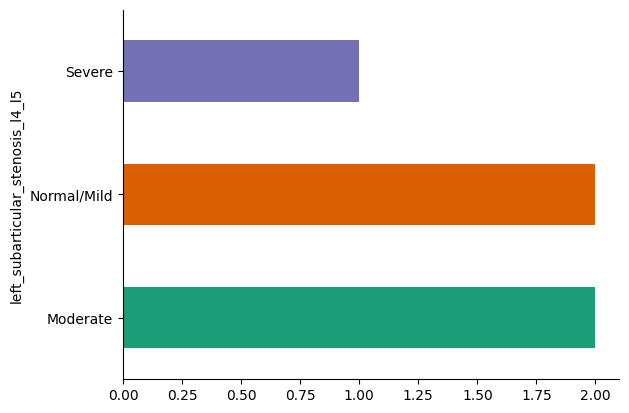

In [205]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('left_subarticular_stenosis_l4_l5').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [206]:

# Check for null values in each column
null_counts = labels_df.isnull().sum()

# Display the columns with their respective count of null values
print(null_counts[null_counts > 0])

spinal_canal_stenosis_l1_l2                 1
spinal_canal_stenosis_l2_l3                 1
spinal_canal_stenosis_l3_l4                 1
spinal_canal_stenosis_l4_l5                 1
spinal_canal_stenosis_l5_s1                 1
left_neural_foraminal_narrowing_l1_l2       2
left_neural_foraminal_narrowing_l2_l3       2
left_neural_foraminal_narrowing_l3_l4       2
left_neural_foraminal_narrowing_l4_l5       2
left_neural_foraminal_narrowing_l5_s1       2
right_neural_foraminal_narrowing_l1_l2      8
right_neural_foraminal_narrowing_l2_l3      8
right_neural_foraminal_narrowing_l3_l4      8
right_neural_foraminal_narrowing_l4_l5      8
right_neural_foraminal_narrowing_l5_s1      8
left_subarticular_stenosis_l1_l2          164
left_subarticular_stenosis_l2_l3           82
left_subarticular_stenosis_l3_l4            3
left_subarticular_stenosis_l4_l5            3
left_subarticular_stenosis_l5_s1           11
right_subarticular_stenosis_l1_l2         161
right_subarticular_stenosis_l2_l3 

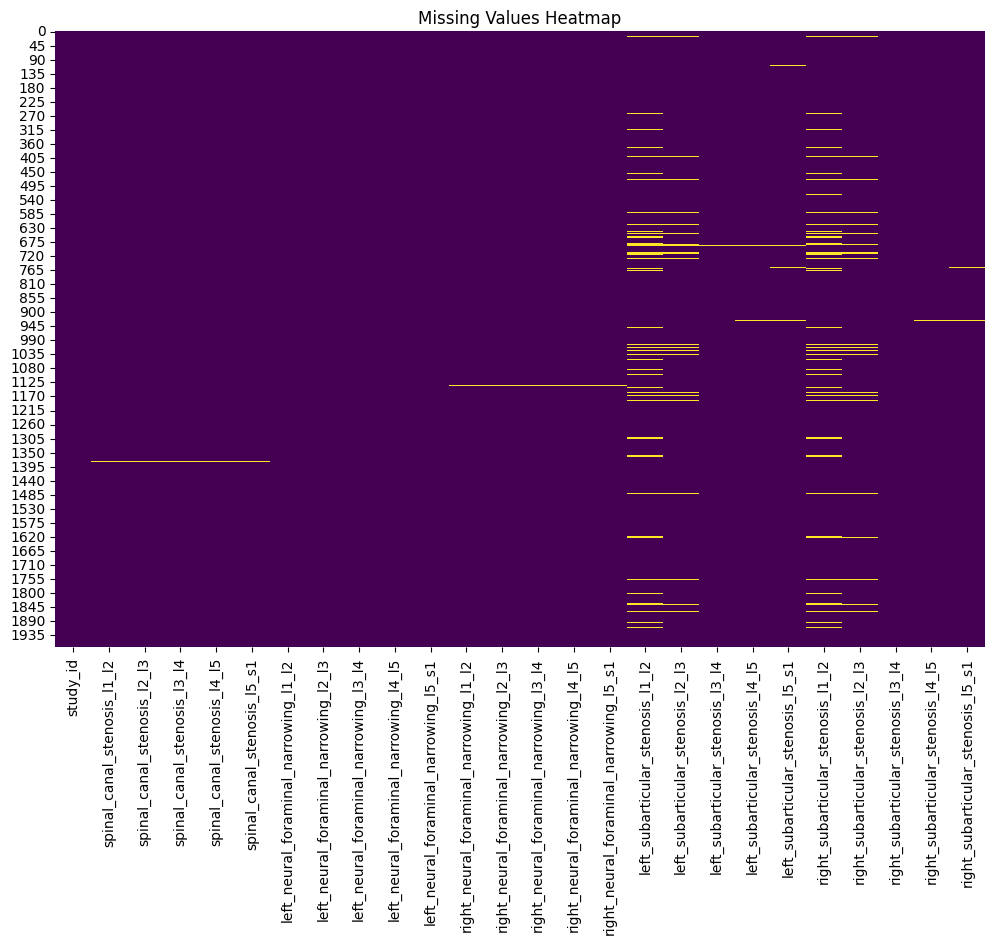

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(labels_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

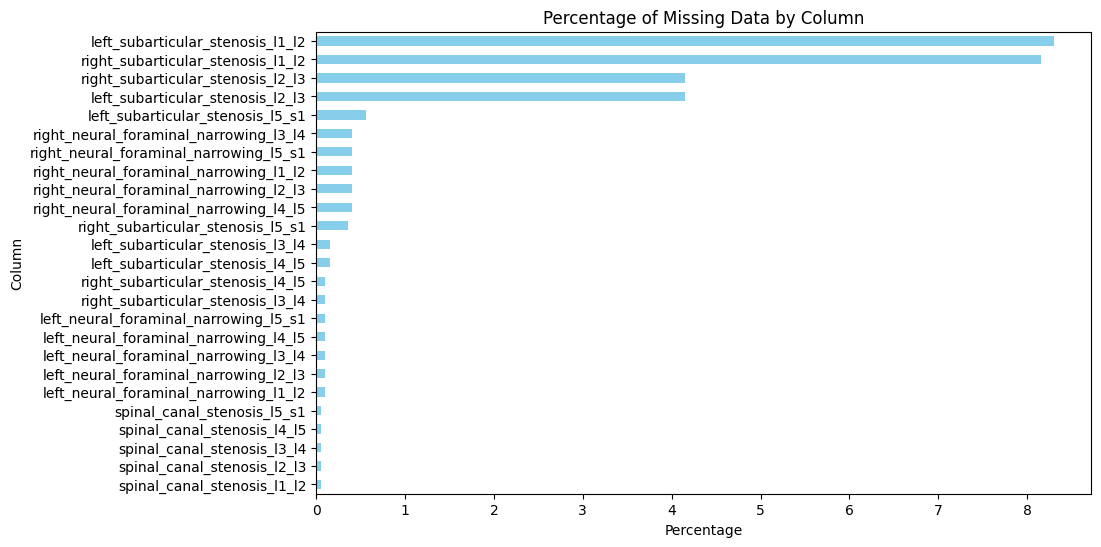

In [208]:
# Calculate the percentage of missing values for each column
missing_percentage = (labels_df.isnull().sum() / len(labels_df)) * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Plot the missing data
plt.figure(figsize=(10, 6))
missing_percentage.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Percentage')
plt.ylabel('Column')
plt.show()

<ipython-input-209-bd57e53c99e4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_df_mapped, x=col, palette='viridis')
<ipython-input-209-bd57e53c99e4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_df_mapped, x=col, palette='viridis')
<ipython-input-209-bd57e53c99e4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_df_mapped, x=col, palette='viridis')
<ipython-input-209-bd57e53c99e4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

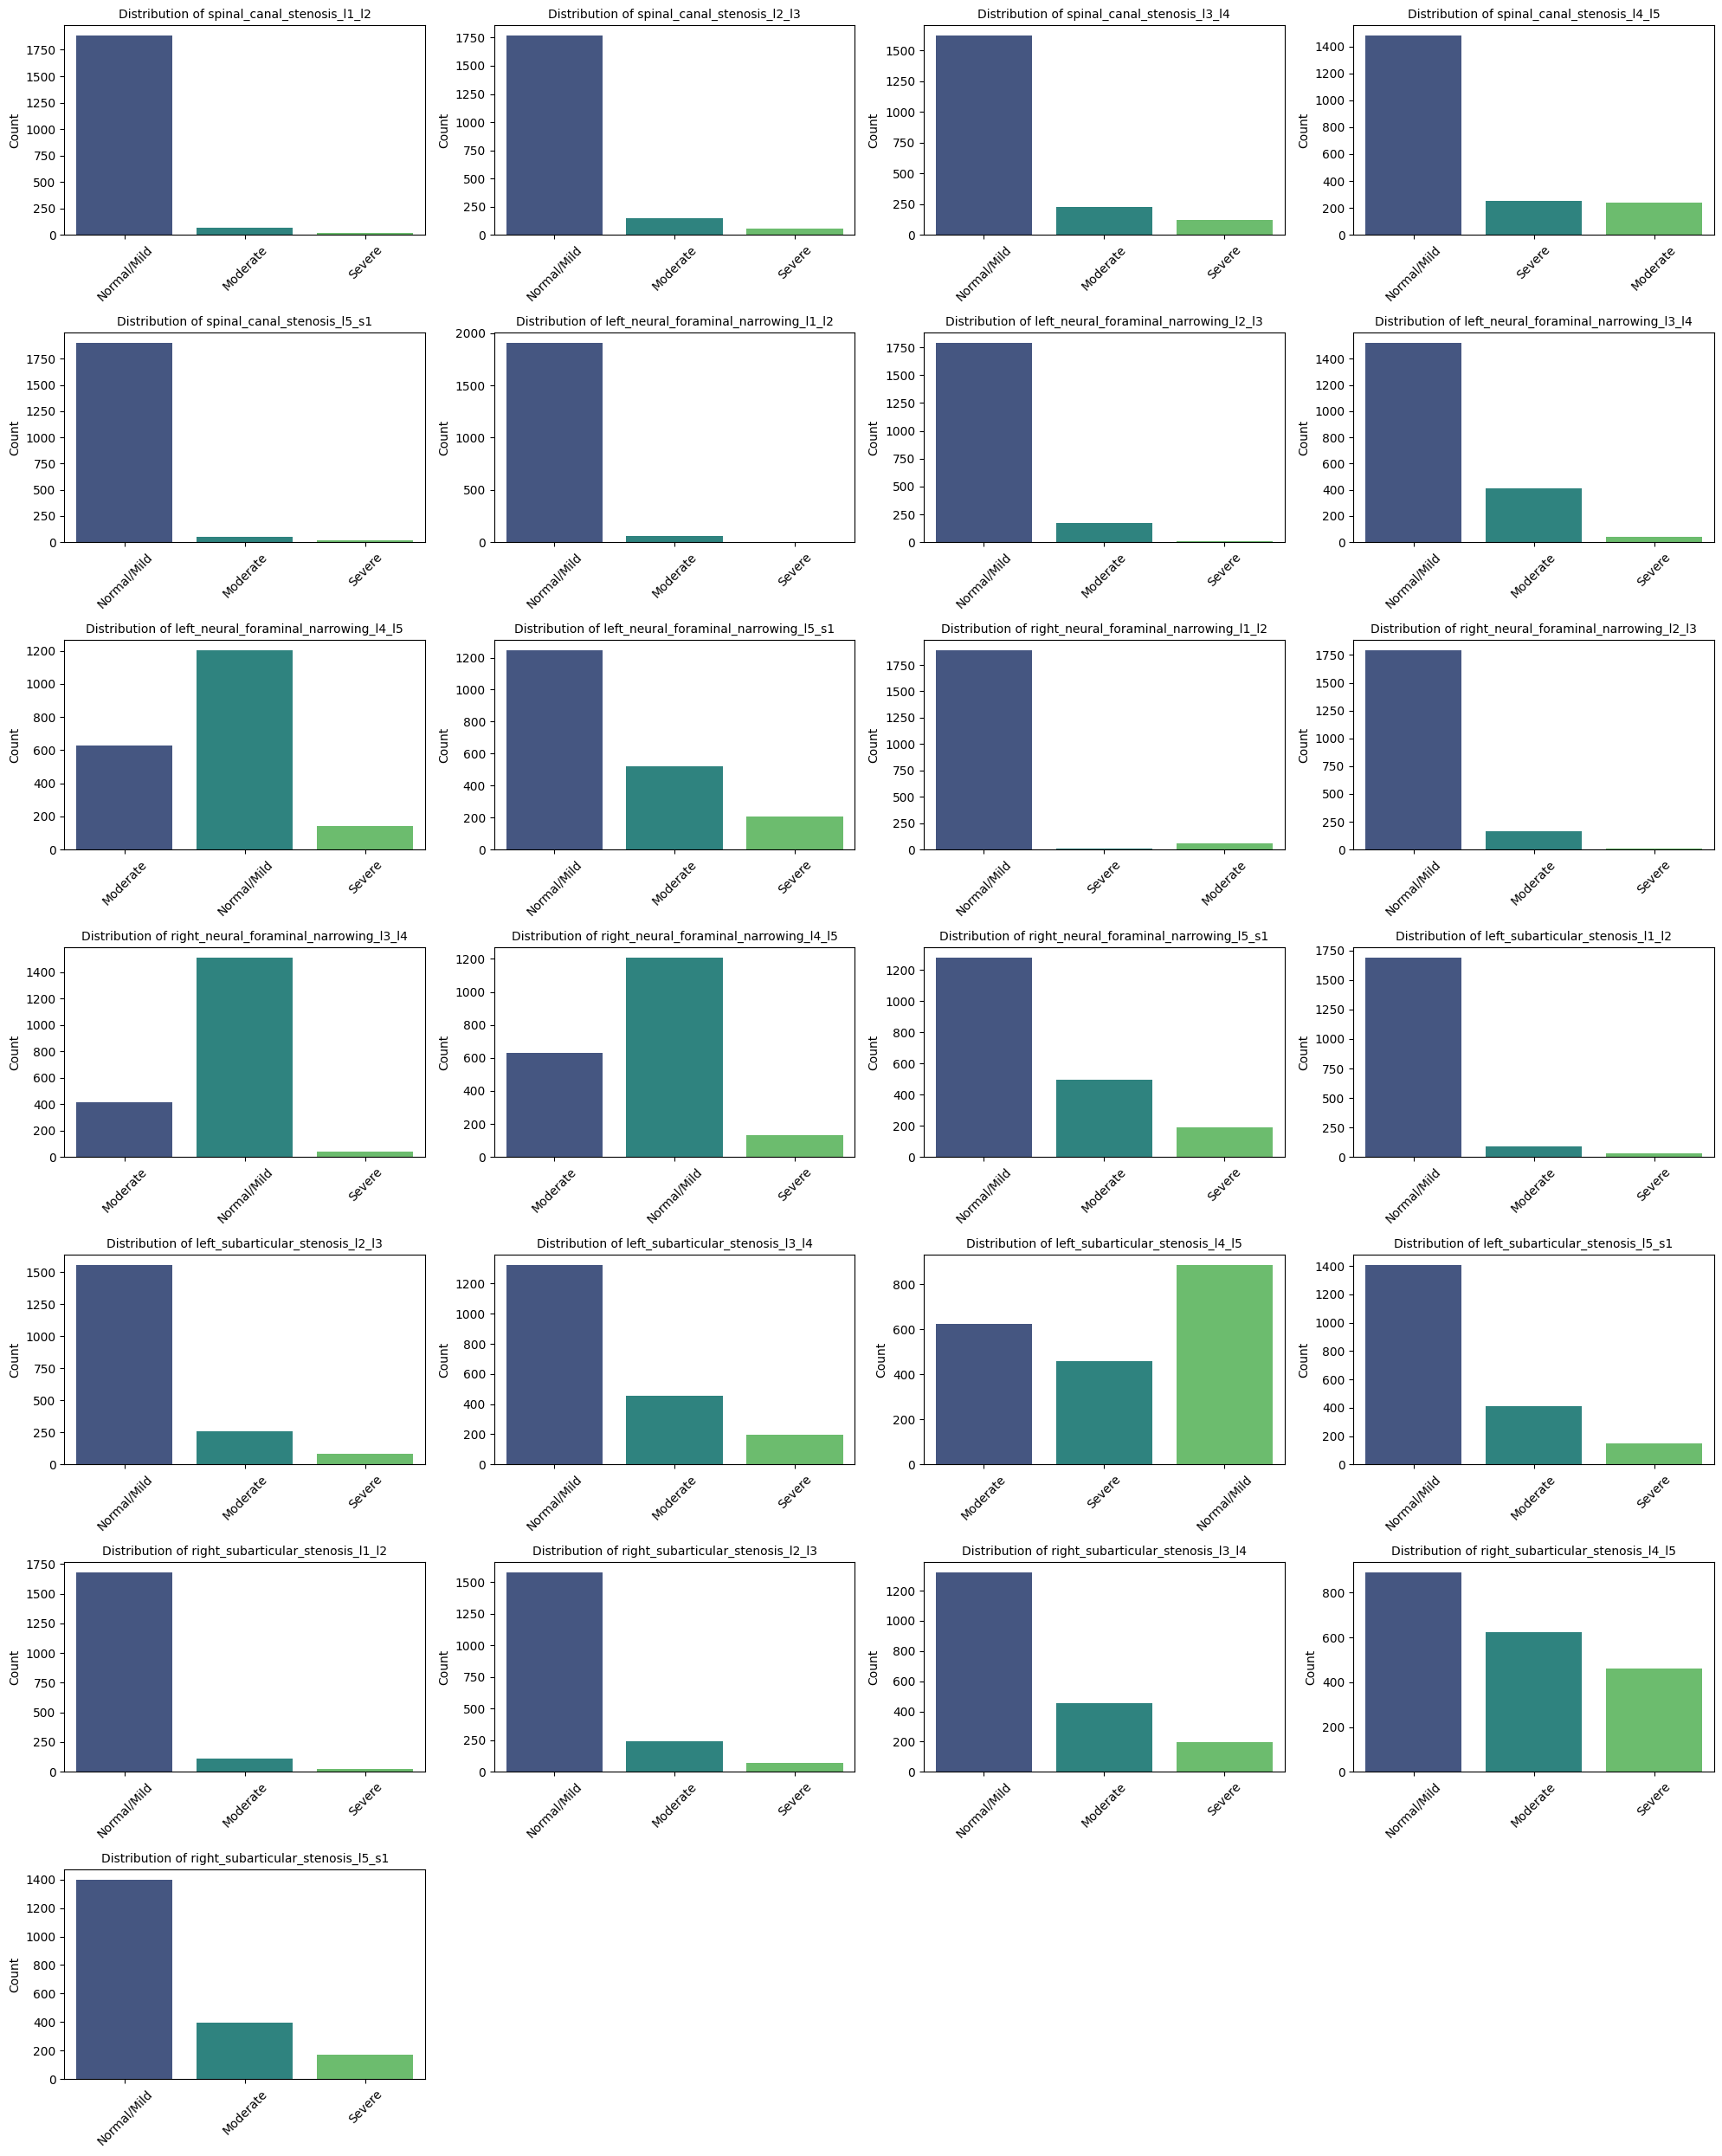

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Define columns to visualize
# columns_to_visualize = [
#     'spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3',
#     'spinal_canal_stenosis_l3_l4', 'spinal_canal_stenosis_l4_l5',
#     'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2',
#     'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4',
#     'left_neural_foraminal_narrowing_l4_l5', 'left_neural_foraminal_narrowing_l5_s1',
#     'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3',
#     'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5',
#     'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l1_l2',
#     'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4',
#     'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1',
#     'right_subarticular_stenosis_l1_l2', 'right_subarticular_stenosis_l2_l3',
#     'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5',
#     'right_subarticular_stenosis_l5_s1'
# ]

# # Adjust figure size and layout
# plt.figure(figsize=(20, 25))
# num_cols = 4  # Number of columns in the grid

# # Loop through columns and create subplots
# for i, col in enumerate(columns_to_visualize, 1):
#     plt.subplot(len(columns_to_visualize) // num_cols + 1, num_cols, i)
#     sns.countplot(data=labels_df, x=col, palette='viridis')
#     plt.title(f'Distribution of {col}', fontsize=10)
#     plt.xlabel('')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# # Adjust layout to avoid overlapping
# plt.tight_layout()
# plt.show()


# Define the mapping from numerical labels to condition states
condition_mapping = {
    0: "No Stenosis",
    1: "Mild Stenosis",
    2: "Moderate Stenosis",
    3: "Severe Stenosis"
}

# Replace the numerical values in the DataFrame with the condition states
labels_df_mapped = labels_df.copy()
for col in columns_to_visualize:
    labels_df_mapped[col] = labels_df_mapped[col].replace(condition_mapping)

# Now you can visualize the class distribution using the mapped DataFrame
plt.figure(figsize=(20, 25))
num_cols = 4  # Number of columns in the grid

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(len(columns_to_visualize) // num_cols + 1, num_cols, i)
    sns.countplot(data=labels_df_mapped, x=col, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Total DICOM files found: 60
Displaying DICOM file: /content/train_images/100206310/1012284084/44.dcm


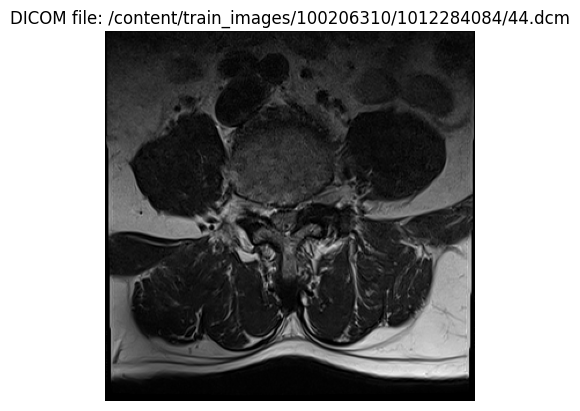

Metadata for /content/train_images/100206310/1012284084/44.dcm:
(0008, 0018) - SOP Instance UID: 100206310.1.44
(0008, 0023) - Content Date: 20240503
(0008, 0033) - Content Time: 223742.360955
(0008, 103e) - Series Description: T2
(0010, 0020) - Patient ID: 100206310
(0018, 0050) - Slice Thickness: 3.5
(0018, 0088) - Spacing Between Slices: 3.5
(0018, 5100) - Patient Position: HFS
(0020, 000d) - Study Instance UID: 100206310
(0020, 000e) - Series Instance UID: 100206310.1012284084
(0020, 0013) - Instance Number: 44
(0020, 0032) - Image Position (Patient): [-68.897767621523, -16.492327581899, -573.7262403714]
(0020, 0037) - Image Orientation (Patient): [0.99864608474231, 0.03009120003407, -0.0424325006258, -0.0202212306842, 0.97611506072478, 0.21631109554499]
(0020, 0052) - Frame of Reference UID: 1.2.826.0.1.3680043.8.498.57059977131044894489781931621155546154
(0020, 1041) - Slice Location: -559.36734630157
(0028, 0002) - Samples per Pixel: 1
(0028, 0004) - Photometric Interpretation: 

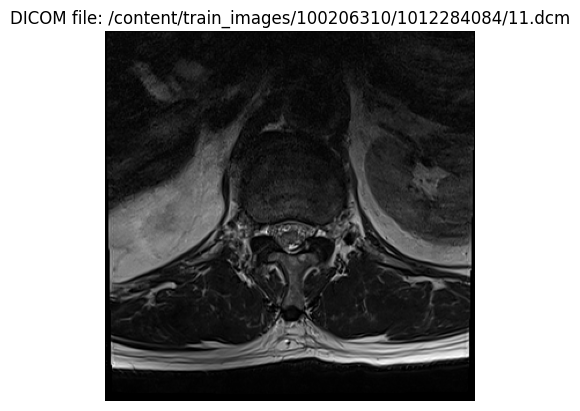

Metadata for /content/train_images/100206310/1012284084/11.dcm:
(0008, 0018) - SOP Instance UID: 100206310.1.11
(0008, 0023) - Content Date: 20240503
(0008, 0033) - Content Time: 223747.279179
(0008, 103e) - Series Description: T2
(0010, 0020) - Patient ID: 100206310
(0018, 0050) - Slice Thickness: 3.5
(0018, 0088) - Spacing Between Slices: 3.5
(0018, 5100) - Patient Position: HFS
(0020, 000d) - Study Instance UID: 100206310
(0020, 000e) - Series Instance UID: 100206310.1012284084
(0020, 0013) - Instance Number: 11
(0020, 0032) - Image Position (Patient): [-66.496682557089, -8.4788645249194, -431.66020908738]
(0020, 0037) - Image Orientation (Patient): [0.99944538826001, 0.0171142607981, -0.0285660281301, -0.020237366989, 0.99340140339889, -0.1128897723554]
(0020, 0052) - Frame of Reference UID: 1.2.826.0.1.3680043.8.498.57059977131044894489781931621155546154
(0020, 1041) - Slice Location: -431.44362425438
(0028, 0002) - Samples per Pixel: 1
(0028, 0004) - Photometric Interpretation: M

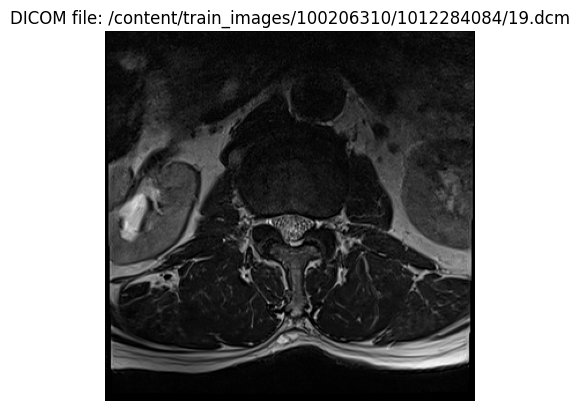

Metadata for /content/train_images/100206310/1012284084/19.dcm:
(0008, 0018) - SOP Instance UID: 100206310.1.19
(0008, 0023) - Content Date: 20240503
(0008, 0033) - Content Time: 223741.756226
(0008, 103e) - Series Description: T2
(0010, 0020) - Patient ID: 100206310
(0018, 0050) - Slice Thickness: 3.5
(0018, 0088) - Spacing Between Slices: 3.5
(0018, 5100) - Patient Position: HFS
(0020, 000d) - Study Instance UID: 100206310
(0020, 000e) - Series Instance UID: 100206310.1012284084
(0020, 0013) - Instance Number: 19
(0020, 0032) - Image Position (Patient): [-67.326688202841, -12.728673790056, -461.80085792924]
(0020, 0037) - Image Orientation (Patient): [0.99944538826001, 0.0171142607981, -0.0285660281301, -0.020237366989, 0.99340140339889, -0.1128897723554]
(0020, 0052) - Frame of Reference UID: 1.2.826.0.1.3680043.8.498.57059977131044894489781931621155546154
(0020, 1041) - Slice Location: -461.88312086097
(0028, 0002) - Samples per Pixel: 1
(0028, 0004) - Photometric Interpretation: M

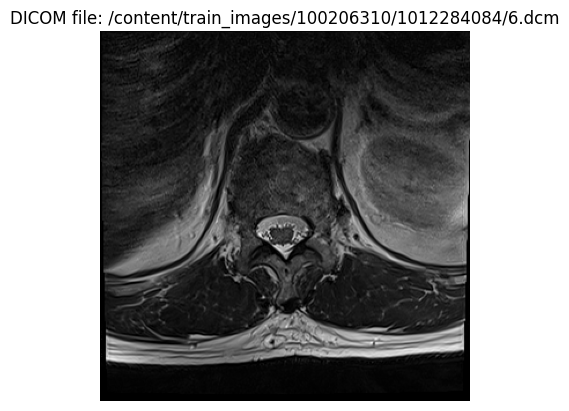

Metadata for /content/train_images/100206310/1012284084/6.dcm:
(0008, 0018) - SOP Instance UID: 100206310.1.6
(0008, 0023) - Content Date: 20240503
(0008, 0033) - Content Time: 223741.973926
(0008, 103e) - Series Description: T2
(0010, 0020) - Patient ID: 100206310
(0018, 0050) - Slice Thickness: 3.5
(0018, 0088) - Spacing Between Slices: 3.5
(0018, 5100) - Patient Position: HFS
(0020, 000d) - Study Instance UID: 100206310
(0020, 000e) - Series Instance UID: 100206310.1012284084
(0020, 0013) - Instance Number: 6
(0020, 0032) - Image Position (Patient): [-65.859523053576, -4.8752122591467, -413.06735367251]
(0020, 0037) - Image Orientation (Patient): [0.9996938184487, 0.01849963064507, -0.0164326815051, -0.0202423499163, 0.99337340681057, -0.1131349720972]
(0020, 0052) - Frame of Reference UID: 1.2.826.0.1.3680043.8.498.57059977131044894489781931621155546154
(0020, 1041) - Slice Location: -411.84941836717
(0028, 0002) - Samples per Pixel: 1
(0028, 0004) - Photometric Interpretation: MON

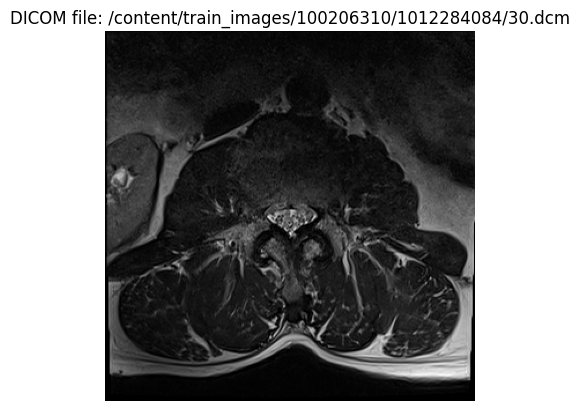

Metadata for /content/train_images/100206310/1012284084/30.dcm:
(0008, 0018) - SOP Instance UID: 100206310.1.30
(0008, 0023) - Content Date: 20240503
(0008, 0033) - Content Time: 223744.768712
(0008, 103e) - Series Description: T2
(0010, 0020) - Patient ID: 100206310
(0018, 0050) - Slice Thickness: 3.5
(0018, 0088) - Spacing Between Slices: 3.5
(0018, 5100) - Patient Position: HFS
(0020, 000d) - Study Instance UID: 100206310
(0020, 000e) - Series Instance UID: 100206310.1012284084
(0020, 0013) - Instance Number: 30
(0020, 0032) - Image Position (Patient): [-68.457000270588, -18.64606850324, -503.40558143906]
(0020, 0037) - Image Orientation (Patient): [0.99945175454685, 0.01736033512124, -0.028192358853, -0.0202374615946, 0.99424473602827, -0.1052038498738]
(0020, 0052) - Frame of Reference UID: 1.2.826.0.1.3680043.8.498.57059977131044894489781931621155546154
(0020, 1041) - Slice Location: -504.17583890916
(0028, 0002) - Samples per Pixel: 1
(0028, 0004) - Photometric Interpretation: M

In [210]:
import os
import matplotlib.pyplot as plt
import pydicom

# Path to the DICOM files folder (update this path according to your dataset structure)
dcm_folder = '/content/train_images/100206310/1012284084'

# List all DICOM files
dcm_files = []
for dirname, _, filenames in os.walk(dcm_folder):
    for filename in filenames:
        if filename.endswith('.dcm'):
            full_path = os.path.join(dirname, filename)
            dcm_files.append(full_path)

# Check if files are found
if not dcm_files:
    print("No DICOM files found in the specified directory.")
else:
    print(f"Total DICOM files found: {len(dcm_files)}")

# List to store the DICOM data
dicom_data_list = []

# Assuming dcm_files is a list of file paths
for dicom_file in dcm_files[:5]:  # Limit to the first 5 files
    try:
        dicom_data = pydicom.dcmread(dicom_file)
        if hasattr(dicom_data, 'pixel_array'):
            dicom_data_list.append((dicom_file, dicom_data))
        else:
            print(f"No pixel data in DICOM file: {dicom_file}")
    except Exception as e:
        print(f"Error reading {dicom_file}: {e}")

# Display the images and print all metadata
for dicom_file, dicom_data in dicom_data_list:
    try:
        print(f"Displaying DICOM file: {dicom_file}")
        plt.imshow(dicom_data.pixel_array, cmap=plt.cm.gray)
        plt.title(f"DICOM file: {dicom_file}")
        plt.axis('off')  # Hide axis labels
        plt.show()

        # Display all metadata
        print(f"Metadata for {dicom_file}:")
        for elem in dicom_data:
            print(f"{elem.tag} - {elem.name}: {elem.value}")

    except AttributeError:
        print(f"No pixel data found for {dicom_file}.")


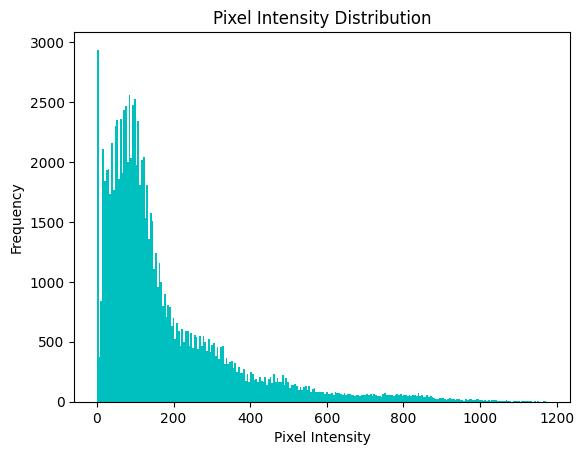

In [211]:
import numpy as np
pixel_data = dicom_data.pixel_array
plt.hist(pixel_data.ravel(), bins=256, color='c')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


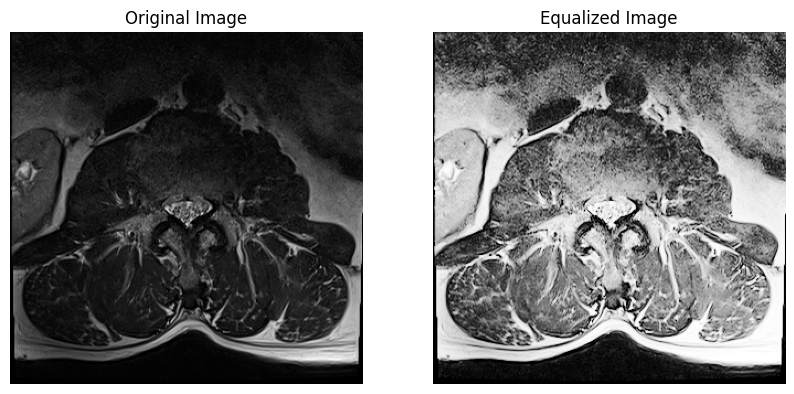

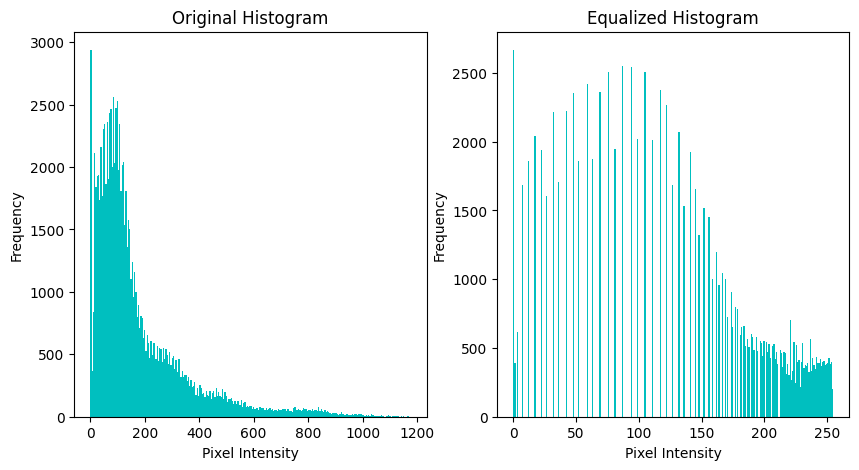

In [231]:
import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt

# # Load the DICOM file
# dcm_file = "/path/to/your/dicom/file.dcm"  # Update with your file path
# dicom_data = pydicom.dcmread(dcm_file)

# Extract pixel array from the DICOM file
pixel_array = dicom_data.pixel_array

# Convert the pixel array to 8-bit (0-255) for histogram equalization
pixel_array_8bit = cv2.normalize(pixel_array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Apply histogram equalization
equalized_image = cv2.equalizeHist(pixel_array_8bit)

# Display the original and equalized images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pixel_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Display the histograms of the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(pixel_array.ravel(), bins=256, color='c')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, color='c')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

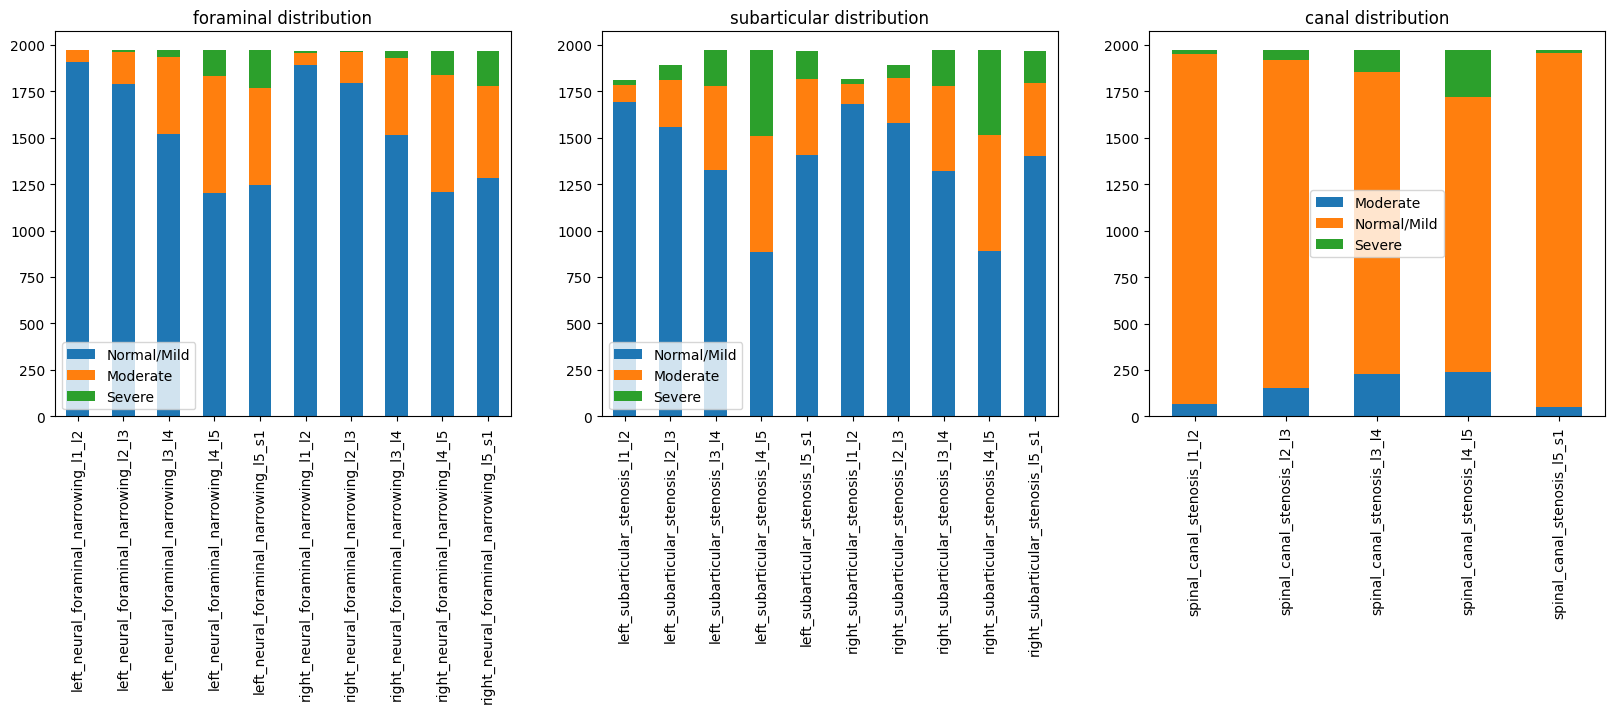

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pydicom
import numpy as np
import os
import glob
from tqdm import tqdm
import warnings
figure, axis = plt.subplots(1,3, figsize=(20,5))
for idx, d in enumerate(['foraminal', 'subarticular', 'canal']):
    diagnosis = list(filter(lambda x: x.find(d) > -1, labels_df.columns))
    dff = labels_df[diagnosis]
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
        value_counts = dff.apply(pd.value_counts).fillna(0).T
    value_counts.plot(kind='bar', stacked=True, ax=axis[idx])
    axis[idx].set_title(f'{d} distribution')

In [213]:
df_coor = pd.read_csv('/content/train_label_coordinates.csv')

df_coor.head()

study_id  series_id  instance_number              condition  level  \
0   4003253  702807833                8  Spinal Canal Stenosis  L1/L2   
1   4003253  702807833                8  Spinal Canal Stenosis  L2/L3   
2   4003253  702807833                8  Spinal Canal Stenosis  L3/L4   
3   4003253  702807833                8  Spinal Canal Stenosis  L4/L5   
4   4003253  702807833                8  Spinal Canal Stenosis  L5/S1   

            x           y  
0  322.831858  227.964602  
1  320.571429  295.714286  
2  323.030303  371.818182  
3  335.292035  427.327434  
4  353.415929  483.964602

In [214]:
# def display_coor_on_img(c, i, title):
#     center_coordinates = (int(c['x']), int(c['y']))
#     radius = 10
#     color = (255, 0, 0)  # Red color in BGR
#     thickness = 2
#     IMG = i['dicom'].pixel_array
#     IMG_normalized = cv2.normalize(IMG, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#     IMG_with_circle = cv2.circle(IMG_normalized.copy(), center_coordinates, radius, color, thickness)

#     # Convert the image from BGR to RGB for correct color display in matplotlib
#     IMG_with_circle = cv2.cvtColor(IMG_with_circle, cv2.COLOR_BGR2RGB)

#     # Display the image
#     plt.imshow(IMG_with_circle)
#     plt.axis('off')  # Turn off axis numbers and ticks
#     plt.title(title)
#     plt.show()

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

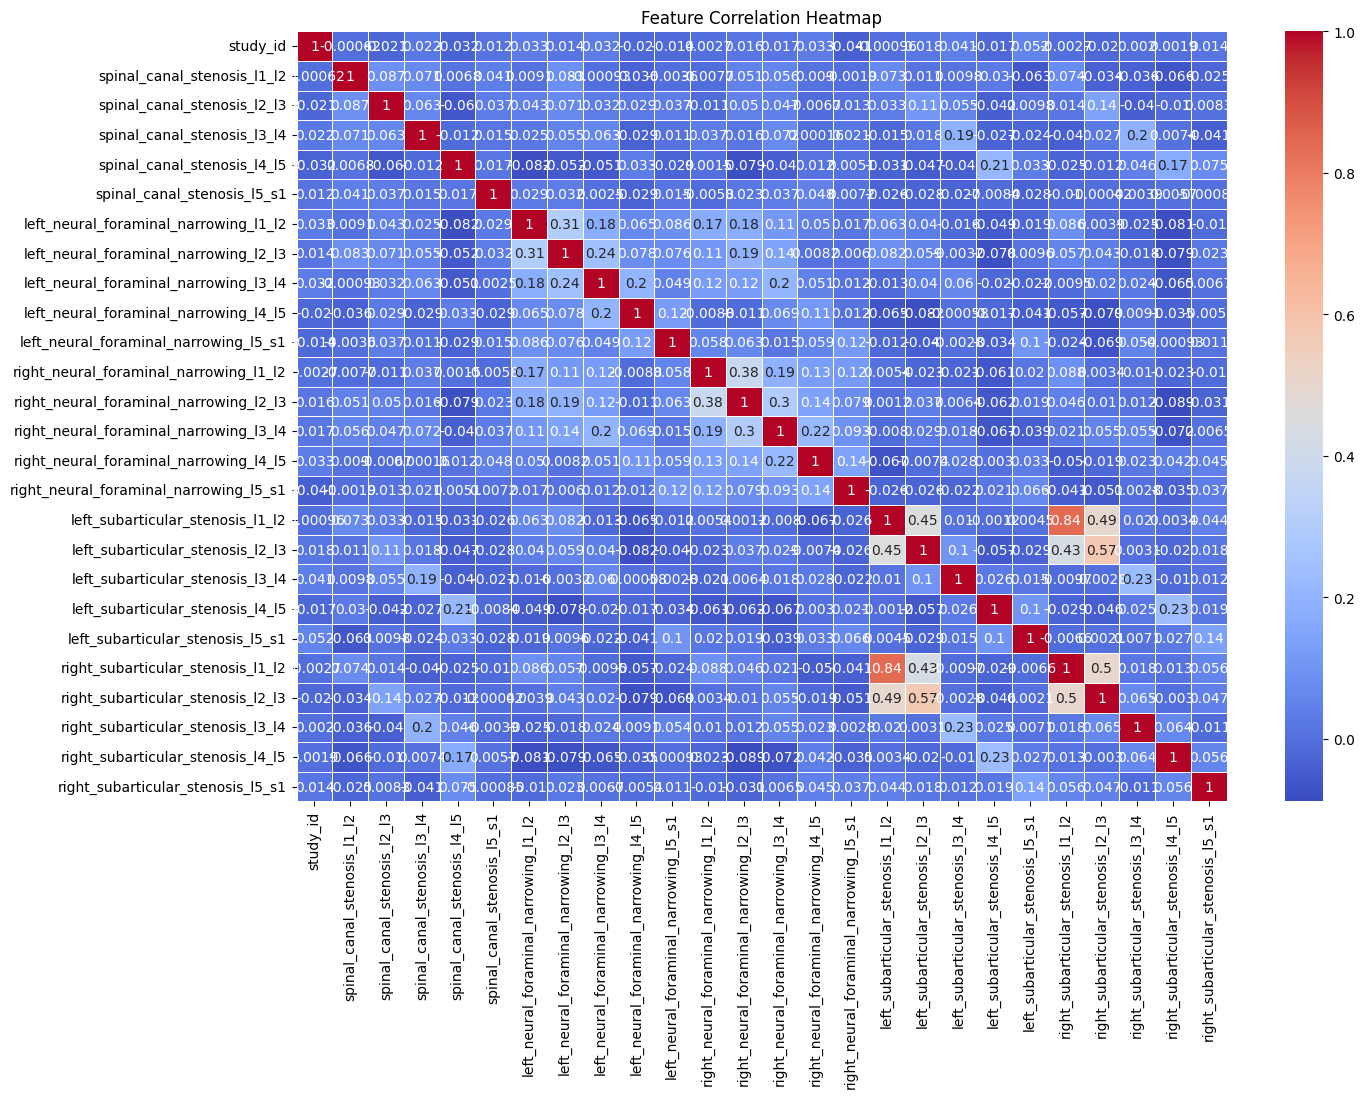

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the CSV file (replace with the actual path)
labels_df = pd.read_csv('/content/train.csv')

# Display the column names in the dataset
print(labels_df.columns)

from sklearn.preprocessing import LabelEncoder

# Identify the columns that need encoding (columns with string data)
categorical_columns = [
    'spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3',
    'spinal_canal_stenosis_l3_l4', 'spinal_canal_stenosis_l4_l5',
    'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2',
    'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4',
    'left_neural_foraminal_narrowing_l4_l5', 'left_neural_foraminal_narrowing_l5_s1',
    'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3',
    'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5',
    'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l1_l2',
    'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4',
    'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1',
    'right_subarticular_stenosis_l1_l2', 'right_subarticular_stenosis_l2_l3',
    'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5',
    'right_subarticular_stenosis_l5_s1'
]

# Apply label encoding to each of the categorical columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    labels_df[col] = label_encoder.fit_transform(labels_df[col])

# Compute the correlation matrix after encoding
correlation_matrix = labels_df.corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [216]:
# Handling missing values (if applicable)
print("Missing values before handling:")
print(labels_df.isnull().sum())

# Fill missing values with the mode (most frequent value) for each column
labels_df.fillna(labels_df.mode().iloc[0], inplace=True)

print("Missing values after handling:")
print(labels_df.isnull().sum())

Missing values before handling:
study_id                                  0
spinal_canal_stenosis_l1_l2               0
spinal_canal_stenosis_l2_l3               0
spinal_canal_stenosis_l3_l4               0
spinal_canal_stenosis_l4_l5               0
spinal_canal_stenosis_l5_s1               0
left_neural_foraminal_narrowing_l1_l2     0
left_neural_foraminal_narrowing_l2_l3     0
left_neural_foraminal_narrowing_l3_l4     0
left_neural_foraminal_narrowing_l4_l5     0
left_neural_foraminal_narrowing_l5_s1     0
right_neural_foraminal_narrowing_l1_l2    0
right_neural_foraminal_narrowing_l2_l3    0
right_neural_foraminal_narrowing_l3_l4    0
right_neural_foraminal_narrowing_l4_l5    0
right_neural_foraminal_narrowing_l5_s1    0
left_subarticular_stenosis_l1_l2          0
left_subarticular_stenosis_l2_l3          0
left_subarticular_stenosis_l3_l4          0
left_subarticular_stenosis_l4_l5          0
left_subarticular_stenosis_l5_s1          0
right_subarticular_stenosis_l1_l2         0


Feature Importances: [0.07313322 0.05262425 0.03031966 0.00561247 0.03094004 0.02618747
 0.02909406 0.03894218 0.03672727 0.02751229 0.02458941 0.02658668
 0.04247747 0.0317397  0.08379097 0.04545449 0.04704601 0.0444653
 0.04462975 0.08083459 0.0588013  0.04688157 0.04560528 0.02600457]


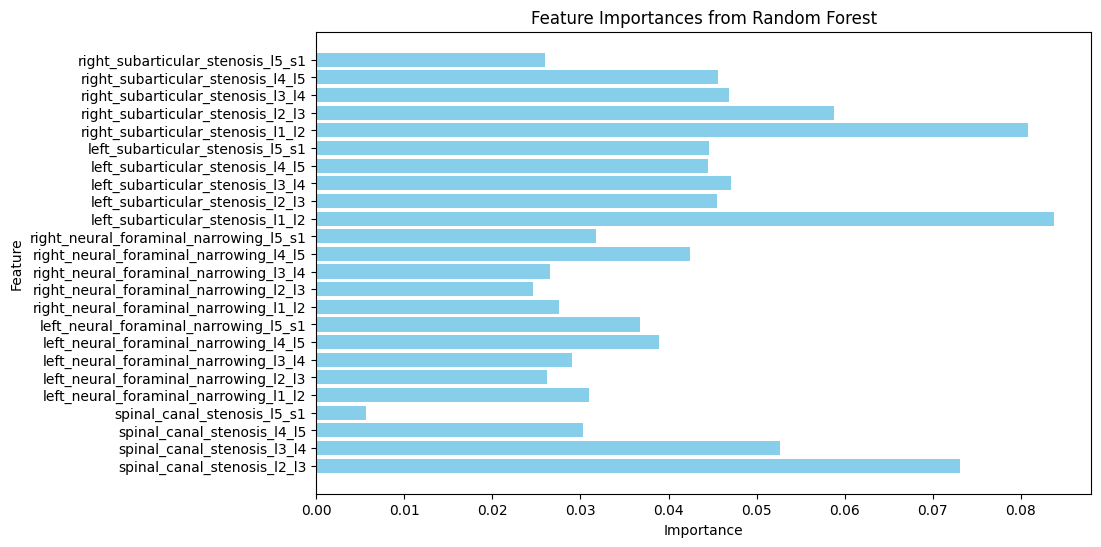

In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset (assuming it's already loaded into df)
# Drop the 'study_id' column, as it is not a feature
X = labels_df.drop(columns=['study_id', 'spinal_canal_stenosis_l1_l2'])  # Replace with the correct target column
y = labels_df['spinal_canal_stenosis_l1_l2']  # Target column

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode the categorical features (if any)
X_encoded = X.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# We can use SMOTE to reduce the class imbalance.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Print the feature importances
print("Feature Importances:", feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

In [218]:
# from sklearn.preprocessing import StandardScaler

# # Example: Standardizing the dataset
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [219]:
# from sklearn.decomposition import PCA

# # Example: Applying PCA to reduce dimensions
# pca = PCA(n_components=5)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [220]:
# Check for missing values
print(labels_df.isnull().sum())

# Fill missing values with median (or any other suitable strategy)
labels_df.fillna(labels_df.mode(), inplace=True)


study_id                                  0
spinal_canal_stenosis_l1_l2               0
spinal_canal_stenosis_l2_l3               0
spinal_canal_stenosis_l3_l4               0
spinal_canal_stenosis_l4_l5               0
spinal_canal_stenosis_l5_s1               0
left_neural_foraminal_narrowing_l1_l2     0
left_neural_foraminal_narrowing_l2_l3     0
left_neural_foraminal_narrowing_l3_l4     0
left_neural_foraminal_narrowing_l4_l5     0
left_neural_foraminal_narrowing_l5_s1     0
right_neural_foraminal_narrowing_l1_l2    0
right_neural_foraminal_narrowing_l2_l3    0
right_neural_foraminal_narrowing_l3_l4    0
right_neural_foraminal_narrowing_l4_l5    0
right_neural_foraminal_narrowing_l5_s1    0
left_subarticular_stenosis_l1_l2          0
left_subarticular_stenosis_l2_l3          0
left_subarticular_stenosis_l3_l4          0
left_subarticular_stenosis_l4_l5          0
left_subarticular_stenosis_l5_s1          0
right_subarticular_stenosis_l1_l2         0
right_subarticular_stenosis_l2_l

In [221]:
# from sklearn.feature_selection import SelectFromModel

# # Apply label encoding to categorical columns
# categorical_columns = [
#     'spinal_canal_stenosis_l1_l2', 'spinal_canal_stenosis_l2_l3',
#     'spinal_canal_stenosis_l3_l4', 'spinal_canal_stenosis_l4_l5',
#     'spinal_canal_stenosis_l5_s1', 'left_neural_foraminal_narrowing_l1_l2',
#     'left_neural_foraminal_narrowing_l2_l3', 'left_neural_foraminal_narrowing_l3_l4',
#     'left_neural_foraminal_narrowing_l4_l5', 'left_neural_foraminal_narrowing_l5_s1',
#     'right_neural_foraminal_narrowing_l1_l2', 'right_neural_foraminal_narrowing_l2_l3',
#     'right_neural_foraminal_narrowing_l3_l4', 'right_neural_foraminal_narrowing_l4_l5',
#     'right_neural_foraminal_narrowing_l5_s1', 'left_subarticular_stenosis_l1_l2',
#     'left_subarticular_stenosis_l2_l3', 'left_subarticular_stenosis_l3_l4',
#     'left_subarticular_stenosis_l4_l5', 'left_subarticular_stenosis_l5_s1',
#     'right_subarticular_stenosis_l1_l2', 'right_subarticular_stenosis_l2_l3',
#     'right_subarticular_stenosis_l3_l4', 'right_subarticular_stenosis_l4_l5',
#     'right_subarticular_stenosis_l5_s1'
# ]

# label_encoder = LabelEncoder()
# for col in categorical_columns:
#     labels_df[col] = label_encoder.fit_transform(labels_df[col])

# # Feature selection using Random Forest
# X = labels_df.drop(['study_id'], axis=1)  # Exclude the study_id column
# y = labels_df['spinal_canal_stenosis_l1_l2']  # Replace with actual target column

# model = RandomForestClassifier(class_weight='balanced')
# model.fit(X, y)

# selected_features = SelectFromModel(model, threshold=0.05).fit_transform(X, y)


In [222]:
# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Visualize transformations
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.hist(X['spinal_canal_stenosis_l1_l2'], bins=30, color='blue', alpha=0.7)
# plt.title('Original Feature Distribution')

# plt.subplot(1, 2, 2)
# plt.hist(X_scaled[:, 0], bins=30, color='green', alpha=0.7)
# plt.title('Standardized Feature Distribution')
# plt.show()


In [223]:
# # Example of feature engineering by creating a new feature
# labels_df['average_stenosis'] = labels_df[['spinal_canal_stenosis_l1_l2',
#                                          'spinal_canal_stenosis_l2_l3',
#                                          'spinal_canal_stenosis_l3_l4']].mean(axis=1)


In [224]:
# # Apply PCA for dimensionality reduction
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_scaled)

# # Explained variance ratio
# print("Explained variance by principal components:", pca.explained_variance_ratio_)


In [225]:
# # Visualize PCA results
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.7, color='red')
# plt.xlabel('Principal Components')
# plt.ylabel('Variance Explained')
# plt.title('PCA Explained Variance')
# plt.show()

# # Now proceed with model building using selected features and transformed data


In [226]:
!pip install prince


In [227]:
# # Fill missing values with the most frequent value (mode) in each column
# # First, handle cases where the mode might not be calculable
# for col in categorical_data.columns:
#     if categorical_data[col].mode().empty:
#         # If mode can't be calculated, fill with a placeholder value
#         categorical_data[col].fillna("Unknown", inplace=True)
#     else:
#         # Otherwise, fill with the mode
#         categorical_data[col].fillna(categorical_data[col].mode().iloc[0], inplace=True)


In [228]:
# # Ensure all columns are of type 'category'
# for col in categorical_data.columns:
#     categorical_data[col] = categorical_data[col].astype('category')


In [229]:
# import pandas as pd
# from prince import MCA

# # Assuming labels_df is your DataFrame
# # Selecting only object type columns for MCA (categorical data)
# categorical_data = labels_df.select_dtypes(include=['object']).copy()

# # Check and handle missing values
# for col in categorical_data.columns:
#     if categorical_data[col].mode().empty:
#         categorical_data[col].fillna("Unknown", inplace=True)
#     else:
#         categorical_data[col].fillna(categorical_data[col].mode().iloc[0], inplace=True)

# # Convert to categorical if not already
# for col in categorical_data.columns:
#     categorical_data[col] = categorical_data[col].astype('category')

# # Now apply MCA
# mca = MCA(n_components=2)
# try:
#     mca_fit = mca.fit(categorical_data)
#     mca_components = mca_fit.transform(categorical_data)
#     print(mca_components)
# except ValueError as e:
#     print(f"An error occurred: {e}")
